In [4]:
#import necessary packages

%matplotlib inline
%config InlineBackend.figure_format ='retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [5]:
### run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5,), (0.5,)),
                               ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

Processing...
Done!


In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


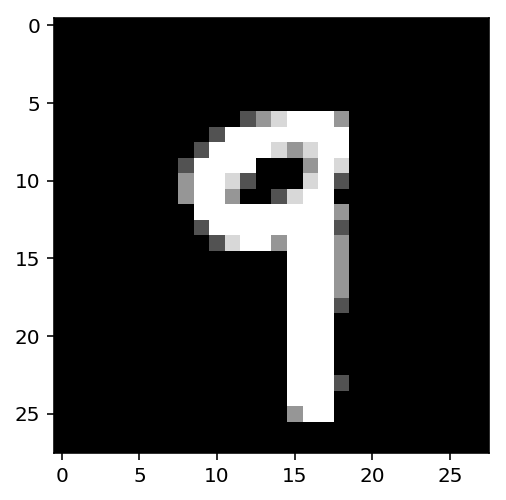

In [7]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [10]:
### Generate some data
torch.manual_seed(7)

# images will be the features which is 784 
inputs = images.view(images.shape[0], -1) #images.shape[0] is the batch size, negative one implies flattening the images
n_input = 784
n_hidden = 256
n_output = 10

#Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
#Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layer
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

def activation(x):
    return (1/(1 + torch.exp(-x)))

h = activation(torch.mm(inputs, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)


tensor([[2.5122e-06, 3.9717e-05, 8.7184e-02, 4.3381e-07, 9.5993e-01, 1.0000e+00,
         6.7998e-01, 9.9999e-01, 5.3585e-10, 2.1340e-05],
        [1.5163e-03, 3.3356e-04, 8.1722e-03, 9.8127e-06, 9.9995e-01, 9.9995e-01,
         4.7978e-04, 9.8756e-03, 1.9790e-06, 6.3150e-01],
        [4.1929e-07, 8.0941e-04, 3.3900e-03, 3.6016e-03, 1.0000e+00, 9.9858e-01,
         3.3275e-07, 9.8904e-01, 9.2946e-06, 4.5836e-02],
        [3.1499e-09, 1.1983e-03, 9.4508e-01, 1.6037e-06, 9.9726e-01, 1.0000e+00,
         9.5072e-02, 9.6272e-01, 3.9053e-08, 4.6115e-02],
        [1.4914e-08, 1.7858e-02, 2.0397e-01, 6.5324e-08, 1.0000e+00, 9.9994e-01,
         9.1171e-01, 1.0000e+00, 3.4124e-03, 1.3171e-01],
        [2.6166e-07, 3.5925e-06, 8.6723e-03, 1.1651e-03, 1.0000e+00, 9.9992e-01,
         8.4655e-01, 3.0294e-01, 2.0032e-06, 3.9381e-01],
        [2.7152e-09, 8.7148e-01, 9.9228e-01, 4.2941e-04, 1.0000e+00, 1.6335e-01,
         6.5393e-03, 4.6578e-02, 3.9451e-05, 2.0262e-02],
        [1.1501e-04, 6.4150